# Data Analysis of ICS Advisories
#### Brandon Cooper, Capstone Project

The data gathered was obtained by webscrabing the ICS advisories published on CISA website (https://www.us-cert.gov/ics/advisories)

## Goal of the Analysis

The purpose of this analysis is to provide insight into patterns of vulnerabilities that pertain to ICS. Specifically I wish to answer the following questions:

- Q1: What are the most common vulnerabilities in ICS?
- Q2: What CWEs are most commonly attributed in ICS?
- Q3: What sectors are most affected by these vulnerabiltiies in ICS?
- Q4: What is the trend of the number of published ICS advisories over time?
- Q5: Is any ICS vendor more suceptible to vulnerabilities?

### The information is stored in a database and will be stored in a dataframe using the pandas library for data analysis

In [127]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("Full_ICSDatabase.db")
df = pd.read_sql_query("SELECT * FROM ICS;", conn)
df.head()

,icsa_id,full_page_url,crawl_date,content,releaseDate,lastRevisedDate,vendor,equipment,vulnerability,sector,deployed,headquarters,cweList,cveList
0,ICSA-20-105-02,https://www.us-cert.gov/ics/advisories/icsa-20...,2020-04-15,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",2020-04-14 00:00:00,None,Triangle MicroWorks,DNP3 Outstation Libraries,Stacked-based Buffer Overflow,Critical Manufacturing,Worldwide,United States,"CWE-121,","CVE-2020-6996,"
1,ICSA-20-105-03,https://www.us-cert.gov/ics/advisories/icsa-20...,2020-04-15,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",2020-04-14 00:00:00,None,Triangle MicroWorks,SCADA Data Gateway,"Stacked-based Buffer Overflow, Out-of-Bounds R...",Critical Manufacturing,Worldwide,United States,"CWE-843,CWE-121,CWE-125,","CVE-2020-10611,CVE-2020-10615,CVE-2020-10613,"
2,ICSA-20-105-04,https://www.us-cert.gov/ics/advisories/icsa-20...,2020-04-15,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",2020-04-14 00:00:00,None,Siemens,Climatix,"Cross-site Scripting, Basic XSS",Commercial Facilities,Worldwide,Germany,"CWE-79,CWE-80,","CVE-2020-7574,CVE-2020-7575,"
3,ICSA-20-105-06,https://www.us-cert.gov/ics/advisories/icsa-20...,2020-04-15,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",2020-04-14 00:00:00,None,Siemens,"SIMOTICS, Desigo, APOGEE, and TALON",Business Logic Errors,"Chemical, Critical Manufacturing, Energy, Foo...",Worldwide,Germany,"CWE-840,","CVE-2019-13939,"
4,ICSA-20-105-07,https://www.us-cert.gov/ics/advisories/icsa-20...,2020-04-15,"<!DOCTYPE html>\n<html lang=""en"" dir=""ltr"" pr...",2020-04-14 00:00:00,None,Siemens,"SCALANCE, SIMATIC",Resource Exhaustion,Critical Manufacturing,Worldwide,Germany,"CWE-400,","CVE-2019-19301,"


### The first step is to determine the range of dates of the ICS Advisories as well as the number of entries

In [128]:
print("The first release date is:", df["releaseDate"].min())
print("The most recent release date:", df["releaseDate"].max())
print()
print("The number of ICS Advisories is:", df.shape[0])

The first release date is: 2010-03-10 00:00:00
The most recent release date: 2020-04-14 00:00:00

The number of ICS Advisories is: 1319


### Next the data needs to be cleaned of any empty fields to have a clean dataset to work with

Unfortunately, the older advisories did not adhere to the stard today of clearly listing information such as the vendor, equipment, etc. Therefore the dataset is cut in half by over 50%.

In [129]:
#Cleans dataframe
df = df[df["vendor"] != ""]
df = df[df["equipment"] != ""]
df = df[df["sector"] != ""]
df = df[df["deployed"] != ""]
df = df[df["headquarters"] != ""]

numEntries = df.shape[0]

print("The first release date after cleaning is:", df["releaseDate"].min())
print("The most recent release date after cleaning is:", df["releaseDate"].max())
print()
print("The number of ICS Advisories after cleaning is:", numEntries)

The first release date after cleaning is: 2012-06-27 00:00:00
The most recent release date after cleaning is: 2020-04-14 00:00:00

The number of ICS Advisories after cleaning is: 597


### Next we need a couple functions to determine counts of the various attributes

In [130]:
from collections import Counter


def countRows(columnString):
    dict = {}
    for row in df[columnString]:
        if(row not in dict):
            dict[row] = 1
        else:
            dict[row] += 1
    return dict    

def countRowsWithLists(columnString, delimeter):
    dict = {}
    for row in df[columnString]:
        entryList = row.split(delimeter)
        for entry in entryList:
            entry = entry.strip()
            if(entry == " " or entry == ""):
                continue
            elif(entry not in dict):
                dict[entry] = 1
            else:
                dict[entry] += 1
    return dict
    
def largestEntries(dict, numLargest):
    counter = Counter(dict)
    return counter.most_common(numLargest)   

### Each attribute in the dataframe is counted and each unique value is a key in the dictionary, with the value being the count

In [131]:
releaseDateDict = countRows("releaseDate")
vendorDict = countRows("vendor")
equipmentDict = countRows("equipment")
deployedDict = countRows("deployed")
headquartersDict = countRows("headquarters")

vulnerabilityDict = countRowsWithLists("vulnerability", ",")
cweDict = countRowsWithLists("cweList", ",")
sectorDict = countRowsWithLists("sector", ",")
cveDict = countRowsWithLists("cveList", ",")

### Next we determine the top X largest value of each attribute

In [132]:
topReleaseDate = largestEntries(releaseDateDict, 15)
topVendor = largestEntries(vendorDict, 10)
topEquipment = largestEntries(equipmentDict, 15)
topDeployed = largestEntries(deployedDict, 15)
topHeadquarters = largestEntries(headquartersDict, 15)

topVuln = largestEntries(vulnerabilityDict, 10)
topCWE = largestEntries(cweDict, 15)
topSector = largestEntries(sectorDict, 10)
topCVE = largestEntries(cveDict, 15)

In [133]:
print(topVuln)

[('Stack-based Buffer Overflow', 74), ('Improper Input Validation', 71), ('Cross-site Scripting', 46), ('Improper Authentication', 43), ('Improper Access Control', 34), ('Heap-based Buffer Overflow', 29), ('Information Exposure', 27), ('Use of Hard-coded Credentials', 26), ('Missing Authentication for Critical Function', 25), ('Path Traversal', 24)]


### The following function provides an easy way to create a graph of the top X largest values of an attribute

In [134]:
import matplotlib.pyplot as plt
import numpy as np

def plotTupleList(tupleList, title, horizontal=True):    
    if(horizontal):
        tupleList = tupleList[::-1]
        plt.barh(np.arange(len(tupleList)), [val[1] for val in tupleList], align='center', color='green')
        plt.yticks(np.arange(len(tupleList)), [val[0] for val in tupleList], fontsize=14)
        plt.xticks(fontsize=12)
        
    else:
        plt.bar(range(len(tupleList)), [val[1] for val in tupleList], align='center', color='green')
        plt.xticks(range(len(tupleList)), [val[0] for val in tupleList], rotation=75, fontsize=12) 
        plt.yticks(fontsize=12)
    plt.title(title, fontsize=15, fontweight="bold")
    plt.show()

## Q1
### What are the most common vulnerabilities in ICS?

To answer this question we simply plot the top vulnerabilities that were found during the webscraping. Based on the analysis and plot, the first top two vulnerabilities,

- Stack-based Buffer Overflow
- Improper Input Validation

are found to be the largest by a wide margin. The next three vulnerabilities:

- Improper Authentication
- Cross-site Scripting
- Improper Access Control

are also large by a decent margin. The remaining 10 vulnerabilities that were plotted are all about even.

At least one of thee top three vulnerabilities appear in 34.3% of all ICS advisories. 

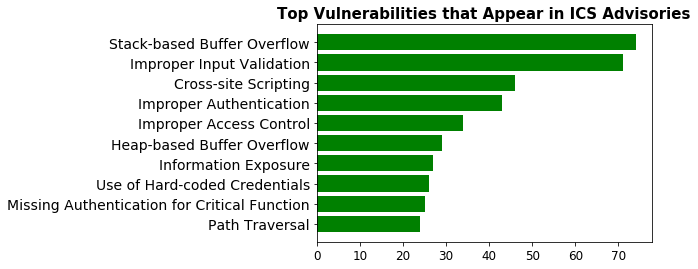

In [135]:
plotTupleList(topVuln, "Top Vulnerabilities that Appear in ICS Advisories")

In [161]:
sum = 0
for vuln in df["vulnerability"]:
    if("STACK-BASED BUFFER OVERFLOW" in vuln.upper() or "IMPROPER INPUT VALIDATION" in vuln.upper() or "CROSS-SITE SCRIPTING" in vuln.upper()):
        sum += 1
print(sum/numEntries * 100, "%")

34.33835845896148 %


## Q2
### What CWEs are most commonly attributed in ICS?

As expected the topCWE follows a similar pattern to the vulnerabilities as the two are inherently linked. Therefore the first two CWEs,

- CWE-20 (Improper Input Validation - https://cwe.mitre.org/data/definitions/20.html)
- CWE-121 (Stack Based Buffer Overflow - https://cwe.mitre.org/data/definitions/121.html)

are the top two by a wide margin. The third CWE,

- CWE-79 (Cross-site Scripting - https://cwe.mitre.org/data/definitions/79.html)

is notable before the rest start to taper down in a linear like pattern. It is interesting to note that the order of the CWEs and the vulnerabilities attributed to an advisory to not follow the exact same pattern. However the top three CWEs line up with the top four vulnerabilities. 

Of the top three CWEs, at least one of them were listed in 41.5% of ICS Advisories. These three top CWEs are common in other domains as well. This indicates that many vulnerabilities in ICS share their root with other domains and are not specific to the industrial control aspect.

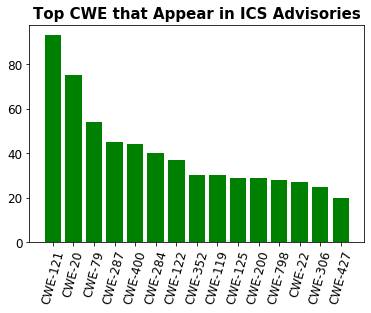

In [137]:
plotTupleList(topCWE, "Top CWE that Appear in ICS Advisories", False)

In [162]:
sum = 0
for cwe in df["cweList"]:
    if("CWE-121" in cwe or "CWE-20" in cwe or "CWE-79" in cwe):
        sum += 1

print(sum/numEntries * 100, "%")

41.541038525963145 %


## Q3
### What sectors are most affected by these vulnerabiltiies in ICS?

This question is rather simple to answer based on the information extracted from the advisories. Each advisory states which sectors are effected. Based on the plot, both Critical Manufacturing and Energy are the most effected, which isn't too suprising. It is interesting to note that the Chemical sector is effected much less than the top two. 

Of the top two sectors, at least one of them is in 81.4% of all ICS advisories. This number may even be higher as some sectors are labeled as "Multiple sectors" which may include Critical Manufacturing or Energy.

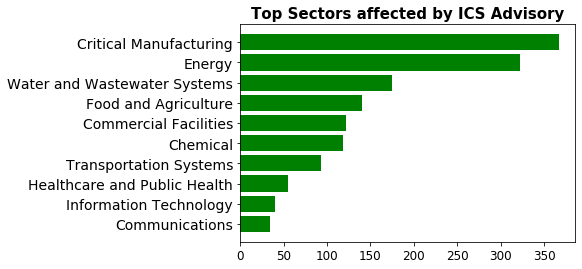

In [139]:
plotTupleList(topSector, "Top Sectors affected by ICS Advisory")

In [163]:
sum = 0
for sector in df["sector"]:
    if("CRITICAL MANUFACTURING" in sector.upper() or "ENERGY" in sector.upper()):
        sum += 1

print(sum/numEntries * 100, "%")

81.4070351758794 %


## Q4
### What is the trend of the number of published ICS advisories over time?

As stated prior, much of the dataset had to be cut due to the difference in formatting as well as lack of complete information. As such, entries in the dataset before 2017 are low or nonexistant. Therefore, only the 2016, 2017, 2018, 2019, and 2020 are displayed in the plot. With further enhancements to the webscraper or manual extraction, better information can be obtained for older years.

In [141]:
count2016 = 0
count2017 = 0
count2018 = 0
count2019 = 0
count2020 = 0
for date in df["releaseDate"]:
    if("2016" in date):
        count2016 += 1
    if("2017" in date):
        count2017 += 1
    if("2018" in date):
        count2018 += 1
    if("2019" in date):
        count2019 += 1
    if("2020" in date):
        count2020 += 1
        
releaseDateCountList = [("2016", count2016), 
                        ("2017", count2017), 
                        ("2018", count2018), 
                        ("2019", count2019), 
                        ("2020", count2020),]

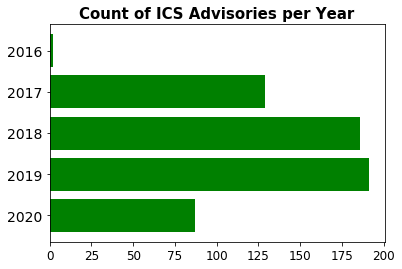

In [142]:
plotTupleList(releaseDateCountList, "Count of ICS Advisories per Year")

## Q5
### Is any ICS vendor more suceptible to vulnerabilities?

Similar to Q3, Q5 is also easily answered based on the gathered data in the advisories as each advisory provides which vendor is affected by the vulnerability. Interestingly, Siemens appears the most in advisories by a large margin. This could indicate Siemens produces more vulnerable products, better report their vulnerabilities, or have more equipment in use. Whichever the case, more investigation is required before drawing a conclusion. 

Regardless, they appear in 24.8% of advisories, which along with the chart below, indicates that a wide range of vendors are mentioned in advisories, but each not in large amounts.

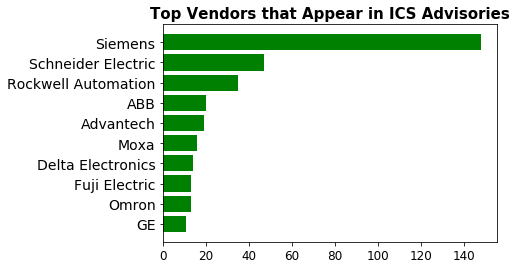

In [145]:
plotTupleList(topVendor, "Top Vendors that Appear in ICS Advisories")

In [164]:
sum = 0
for vendor in df["vendor"]:
    if("SIEMENS" in vendor.upper()):
        sum += 1
        
print(sum/numEntries * 100, "%")

24.79061976549414 %
